In [188]:
import pandas 
import numpy
import datetime
import missingno
import seaborn
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")
# 데이터 경로
PATH = "C:/Users/WAI/OneDrive/03.WORKSPACE/00.DATA/99.KAGGLE/insurance/"

# 데이터 명
DATA_NAME = "14. Learning from Imbalaced Insurance Data/aug_train_mod.csv"


In [177]:
df = pandas.read_csv(PATH + DATA_NAME, index_col=False)
# 실습을 위해 birth_date datetime으로 형변환
df["birth_date"]= pandas.to_datetime(df["birth_date"], format="%Y-%m-%d")
df["insure_date"] = df["insure_date"].apply(str)



In [178]:
# 데이터 형변환
# dataframe dtypes을 사용하여 전체 컬럼의 데이터 타입을 확인
print("birth Date type : {}".format(df["birth_date"].dtypes))
print(df["birth_date"].head(1))
# i) 문자형변환
# 컬럼중 birth_date 는 datetime 형식인것을 확인할 수 있다
# birth_date를 문자형으로 변환해보겠습니다.
df["birth_date"] = df["birth_date"].apply(lambda x : x.strftime('%Y%m%d'))
print("birth Date type : {}".format(df["birth_date"].dtypes))
print(df["birth_date"].head(1))


birth Date type : datetime64[ns]
0   1997-08-09
Name: birth_date, dtype: datetime64[ns]
birth Date type : object
0    19970809
Name: birth_date, dtype: object


In [179]:

# ii) 수치형변환
# Male 과 Female로 되어있는 성별 변수를 수치형으로 변환
# Male = 0으로 Female = 1로변경
df["Gender"][(df['Gender'] == 0 )]= 'Male' 
df["Gender"][(df['Gender'] == 1 )]= 'Female'
print("Gender columnd dtype : {}".format(df["Gender"].dtypes))
print(df["Gender"].head(1))
df["Gender"][(df['Gender'] == 'Male')]= 0 
df["Gender"][(df['Gender'] == 'Female')]= 1
df['Gender'] = df['Gender'].apply(int)
print("Gender columnd dtype : {}".format(df["Gender"].dtypes))
print(df["Gender"].head(1))



Gender columnd dtype : object
0    Male
Name: Gender, dtype: object
Gender columnd dtype : int64
0    0
Name: Gender, dtype: int64


In [180]:
# iii) 날짜형 변환
# insure_date 는 문자형으로 이루어진 날짜데이터입니다
# 문자형 날짜를 datetime형식으로 변환해보도록 하겠습니다.
print("insure date column dtype : {} ".format(df["insure_date"].dtypes))
print(df["insure_date"].head(1))
df["insure_date"] = pandas.to_datetime(df["insure_date"], format='%Y-%m-%d')
print("insure date column dtype : {} ".format(df["insure_date"].dtypes))
print(df["insure_date"].head(1))


insure date column dtype : object 
0    20000106
Name: insure_date, dtype: object
insure date column dtype : datetime64[ns] 
0   2000-01-06
Name: insure_date, dtype: datetime64[ns]


-----------------------------
id                          0
Gender                      0
Age                     26750
Driving_License          1910
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium            382
Policy_Sales_Channel        0
Vintage                  1146
Response                    0
birth_date                  0
insure_date                 0
dtype: int64
-----------------------------
id : 0.0%
Gender : 0.0%
Age : 6.9998%
Driving_License : 0.4998%
Region_Code : 0.0%
Previously_Insured : 0.0%
Vehicle_Age : 0.0%
Vehicle_Damage : 0.0%
Annual_Premium : 0.09996%
Policy_Sales_Channel : 0.0%
Vintage : 0.29988%
Response : 0.0%
birth_date : 0.0%
insure_date : 0.0%


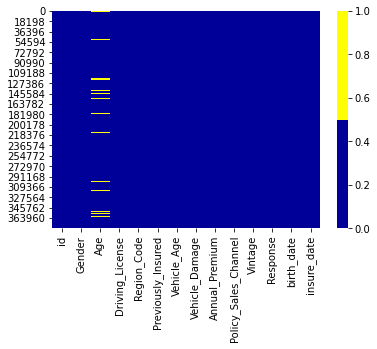

In [181]:
# 결측치 이상치 보정

# i) 결측치

# 결측치 확인
colours = ['#000099','#ffff00']
seaborn.heatmap(df.isnull(), cmap=seaborn.color_palette(colours))

# 결측건수 확인
print("-----------------------------")
print(df.isnull().sum())

# 결측치 비율확인
print("-----------------------------")
for col in iter(df.columns):
    pct_missing = numpy.mean(df[col].isnull())
    print("{0} : {1}%".format(col, round(pct_missing * 100,5)))

# Age, Driving_License, Annual_premium, Vintage 네 개의 컬럼에 결측치가 존재하는 것을 확인할 수 있다.




In [182]:
# 결측치 처리

# 1) 결측치가 존재하는 관측치 삭제
# Annual_Premium의 결칙치 비율은 0.1% 미만이므로 존재하는 관측치 제거
df_mod = df.dropna(subset=["Annual_Premium"],axis = 0)
print("결측관측치 제거전 : {} 건, 제거후 : {}".format(len(df),len(df_mod)))

# 2) 결측치 보정 
# Driving_License 의 Value Count 확인 
print("Driving License 관측치 값 : \n {}".format(df_mod["Driving_License"].value_counts()))
# Driving License의 값은 대부분의 값을 가지고 있고, 자동차 보험관련된 데이터 이기 때문에 
# 결측치의 값을 1올 대체
df_mod["Driving_License"] = df_mod["Driving_License"].fillna(1)
# Age,  Vintage 의 평균값을 사용하여 Null 값 보정
df_mod["Age"] = df_mod["Age"].fillna(df_mod["Age"].mean())
df_mod["Vintage"] = df_mod["Vintage"].fillna(df_mod["Vintage"].mean())

# 보정되었는지 결과 확인
print("---------------------------------")
print("결측치 보정 결과 ")
print(df_mod.isnull().sum())


결측관측치 제거전 : 382154 건, 제거후 : 381772
Driving License 관측치 값 : 
 1.0    379146
0.0       719
Name: Driving_License, dtype: int64
---------------------------------
결측치 보정 결과 
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
birth_date              0
insure_date             0
dtype: int64


                  id         Gender            Age  Driving_License  \
count  381772.000000  381772.000000  381772.000000    381772.000000   
mean   234391.906811       0.461969      38.535247         0.998117   
std    139527.680847       0.498552      14.680680         0.043356   
min         1.000000       0.000000      20.000000         0.000000   
25%    115008.750000       0.000000      25.000000         1.000000   
50%    230461.500000       0.000000      38.000000         1.000000   
75%    345433.250000       1.000000      48.000000         1.000000   
max    508145.000000       1.000000      85.000000         1.000000   

         Region_Code  Previously_Insured  Annual_Premium  \
count  381772.000000       381772.000000   381772.000000   
mean       26.407607            0.489148    30711.275397   
std        13.181450            0.499883    17063.441319   
min         0.000000            0.000000     2630.000000   
25%        15.000000            0.000000    24544.000000   


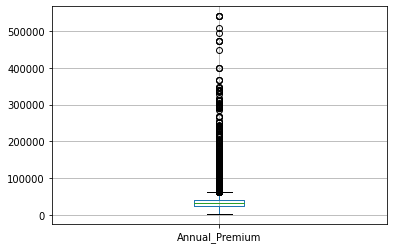

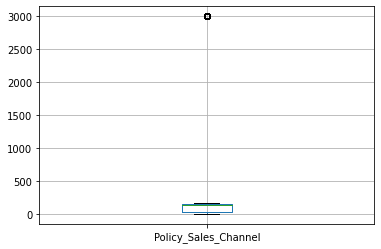

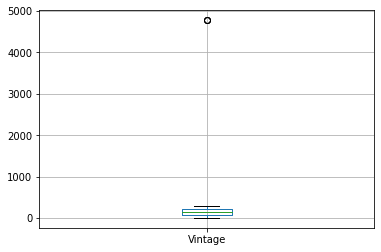

In [197]:
# ii) 이상치
# 이상치 확인
# 데이터의 기초통계량을 확인하여 이상치 포함 여부를 판단
print(df_mod.describe())
# Annual_Premium, Policy_Sales_Channel 세 컬럼에서 평균을 크게 벗어난 값이 있는 것을 확인할 수 있음
# 시각화 자료를 사용하여 이상치 확인
'''
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.boxplot(df["Annual_Premium"],  sym="bo") 
plt.subplot(1,3,2)
plt.boxplot(df["Policy_Sales_Channel"],  sym="bo") 
plt.subplot(1,3,3)
plt.boxplot(df["Vintage"],  sym="bo") 
'''
df_mod.boxplot(column = ["Annual_Premium"])
plt.show()
df_mod.boxplot(column = ["Policy_Sales_Channel"])
plt.show()
df_mod.boxplot(column = ["Vintage"])
plt.show()

# 범위를 벗어나는 이상치가 존재하는 것을 알 수 있다. 

In [250]:
# 이상치 처리
print(df_mod[["Annual_Premium", "Policy_Sales_Channel", "Vintage"]].describe())
# i) 이상치 관측치 제거
# Vintage와 Policy_Sales_Channel의 bob plot을 보면 특정 데이터에만 이상치가 존재하는 것을 확인할 수 있습니다.
# max값으로 잡힌 관측치를 이상치라 판단하고 제거합니다.
# 이상치가 존재하는 index 확인
df_mod = df_mod.loc[df_mod["Policy_Sales_Channel"] != df_mod["Policy_Sales_Channel"].max()]
df_mod = df_mod.loc[df_mod["Vintage"] != df_mod["Vintage"].max()]
print("------------------------ 이상치 제거 ------------------------")
print(df_mod[["Annual_Premium", "Policy_Sales_Channel", "Vintage"]].describe())
# ii) 평균값으로 보정
df_mod.loc[(df_mod["Annual_Premium"] > 42359),"Annual_Premium"] = df_mod["Annual_Premium"].mean()

print("------------------------ 이상치 보정 ------------------------")
print(df_mod[["Annual_Premium", "Policy_Sales_Channel", "Vintage"]].describe())

df_mod.to_csv(PATH + "14. Learning from Imbalaced Insurance Data/aug_train_mod_2.csv", index=False)


       Annual_Premium  Policy_Sales_Channel        Vintage
count   178108.000000         178108.000000  178108.000000
mean     27856.525201             70.273239     144.727945
std      11782.435745             49.262947      78.123439
min       2630.000000              1.000000      10.000000
25%      26294.000000             26.000000      77.000000
50%      32901.909565             26.000000     145.000000
75%      34021.000000            124.000000     212.000000
max      42359.000000            138.000000     280.000000
------------------------ 이상치 제거 ------------------------
       Annual_Premium  Policy_Sales_Channel        Vintage
count   177355.000000         177355.000000  177355.000000
mean     27857.988969             70.230673     144.259045
std      11781.405474             49.248534      77.842845
min       2630.000000              1.000000      10.000000
25%      26294.000000             26.000000      77.000000
50%      32901.909565             26.000000     144.000000

In [249]:
# 데이터 결함
# 
# i) join
df_1 = pandas.DataFrame({'key' : ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                      'A' :['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
            
df_2 = pandas.DataFrame({'key' : ['K0', 'K1', 'K2'],
			          'B' : ['B0', 'B1', 'B2']})


df_1.set_index('key', inplace=True)
df_2.set_index('key',inplace = True)

# 1) join 
print("---- Left Join ----")
print(df_1.join(df_2, how = 'left'))
print("---- Right Join ----")
print(df_1.join(df_2, how = 'right'))
print("---- Inner Join ----")
print(df_1.join(df_2, how = 'inner'))
print("---- Outer Join ----")
print(df_1.join(df_2, how = 'outer'))

# ii) concat

print("---- Concat Row ----")
print(pandas.concat([df_1, df_2], axis = 0))
print("---- Concat column ----")
print(pandas.concat([df_1, df_2], axis = 1))

---- Left Join ----
      A    B
key         
K0   A0   B0
K1   A1   B1
K2   A2   B2
K3   A3  NaN
K4   A4  NaN
K5   A5  NaN
---- Right Join ----
      A   B
key        
K0   A0  B0
K1   A1  B1
K2   A2  B2
---- Inner Join ----
      A   B
key        
K0   A0  B0
K1   A1  B1
K2   A2  B2
---- Outer Join ----
      A    B
key         
K0   A0   B0
K1   A1   B1
K2   A2   B2
K3   A3  NaN
K4   A4  NaN
K5   A5  NaN
---- Concat Row ----
       A    B
key          
K0    A0  NaN
K1    A1  NaN
K2    A2  NaN
K3    A3  NaN
K4    A4  NaN
K5    A5  NaN
K0   NaN   B0
K1   NaN   B1
K2   NaN   B2
---- Concat column ----
      A    B
key         
K0   A0   B0
K1   A1   B1
K2   A2   B2
K3   A3  NaN
K4   A4  NaN
K5   A5  NaN
